# Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn


import warnings                                    
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.shape

(1338, 7)

# Data Cleaning

In [7]:
#checking for all the null values in the columns
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.isnull().sum().sum()

0

# Expolatory Data Analysis (EDA)

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.shape

(1338, 7)

In [11]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

<Axes: >

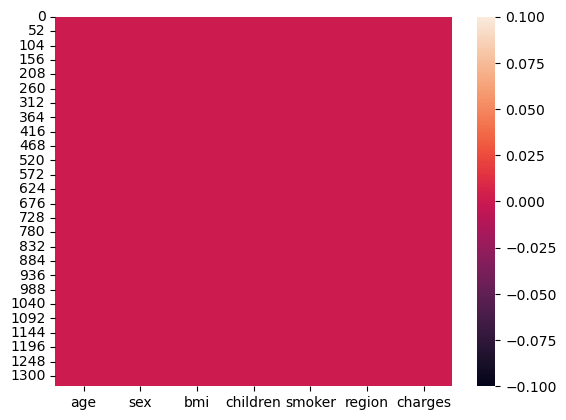

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [14]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


sex
male      676
female    662
Name: count, dtype: int64


bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


smoker
no     1064
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


charges
1639.56310     2
16884.92400    1
29

In [15]:
df.shape[0]

1338

In [16]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [17]:
#Converting Categorical Features to Numerical
updated_df = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
df_copy = df.copy()
df_copy.replace(updated_df, inplace=True)

In [18]:
df_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [19]:
df_copy.shape

(1338, 7)

In [20]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


# Correlation

In [21]:
df_copy.corr()['charges'].sort_values()

sex        -0.057292
region      0.011741
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

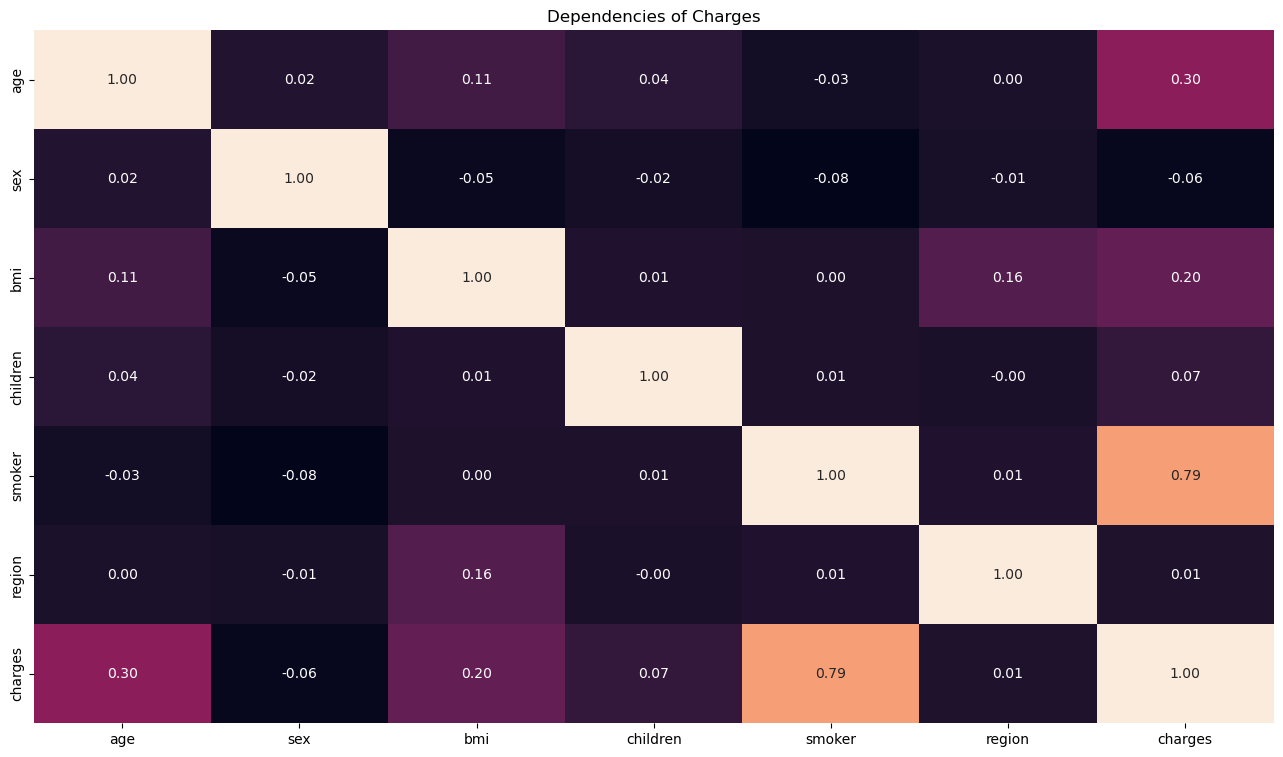

In [22]:
plt.figure(figsize=(16,9))
sns.heatmap(df_copy.corr(),annot=True,fmt='0.2f',cbar=False)
plt.title("Dependencies of Charges")
plt.show()

we can observe that Sex, Children and Region do not affect the Charges. We might drop these 3 columns as they have less correlation

In [23]:
print(df['sex'].value_counts().sort_values()) 
print(df['smoker'].value_counts().sort_values())
print(df['region'].value_counts().sort_values())

sex
female    662
male      676
Name: count, dtype: int64
smoker
yes     274
no     1064
Name: count, dtype: int64
region
northeast    324
southwest    325
northwest    325
southeast    364
Name: count, dtype: int64


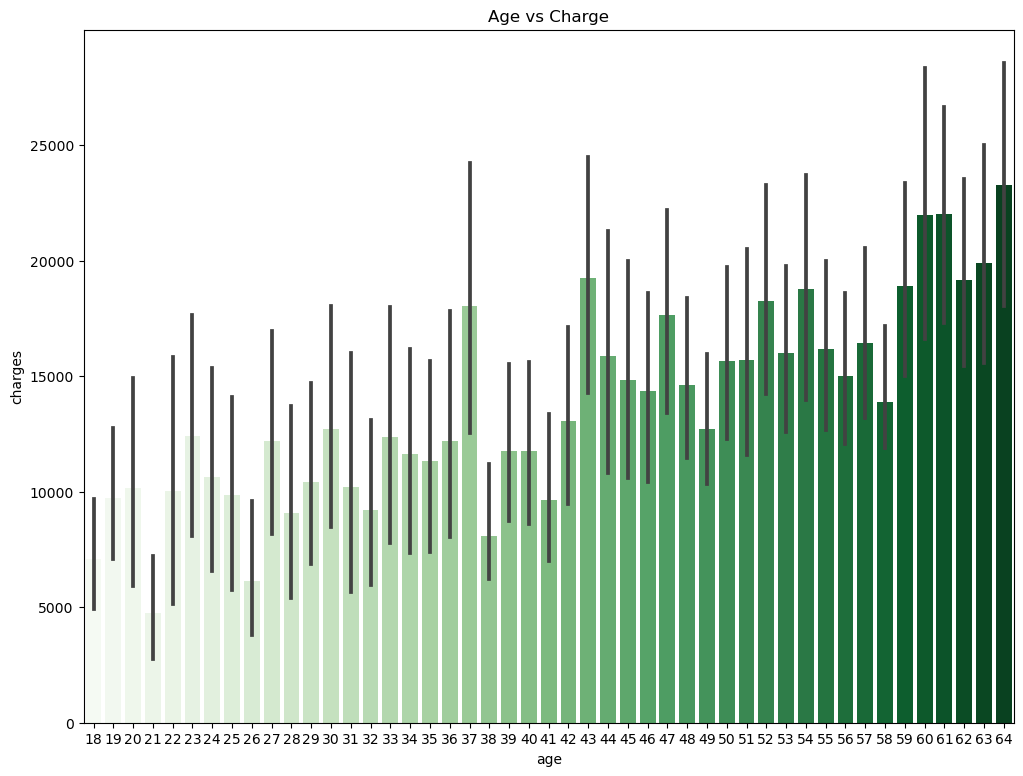

In [24]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=df,palette='Greens')
plt.show()

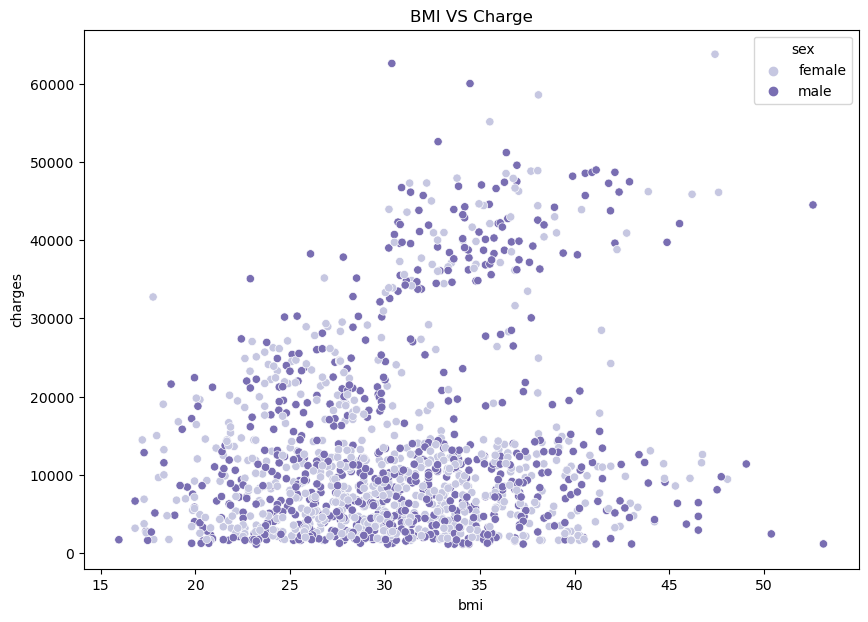

In [25]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=df,palette='Purples')
plt.title('BMI VS Charge')
plt.show()

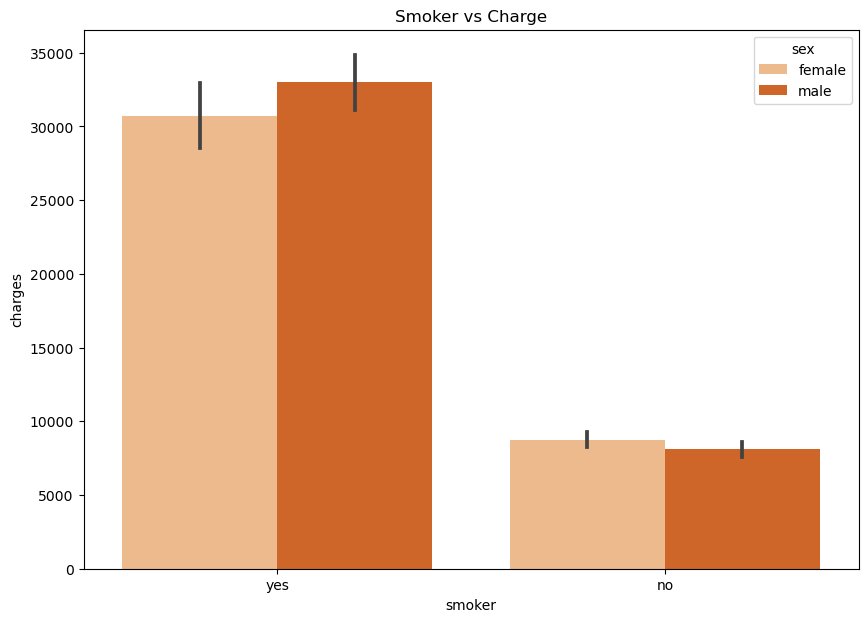

In [26]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=df,palette='Oranges',hue='sex')
plt.show()

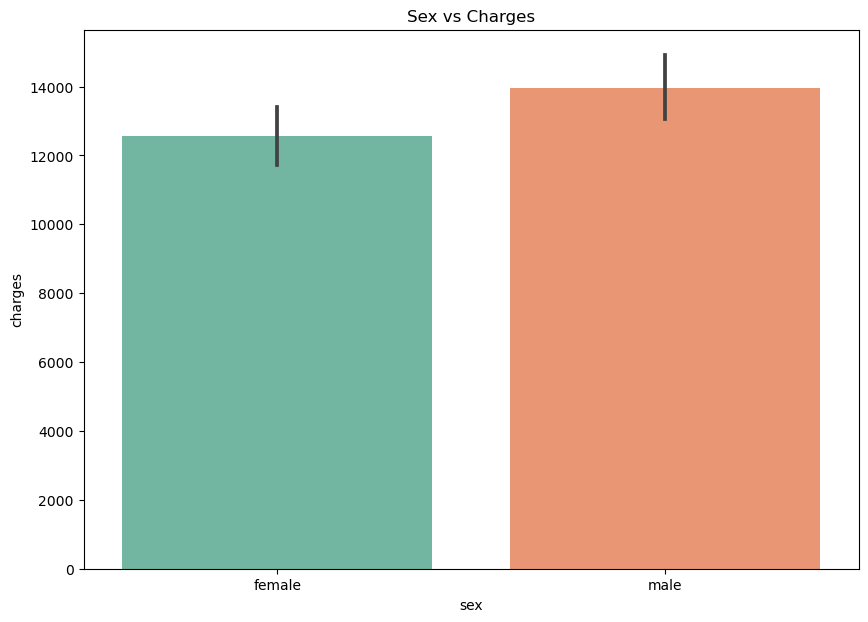

In [27]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=df,palette='Set2')
plt.show()

# Plotting Skew and Kurtosis

In [28]:
print('Plotting Skewness and Kurtosis for all columns')
print()
for col in list(df_copy.columns):
    print('{0} : Skewness {1:.3f} and  Kurtosis {2:.3f}'.format(col,df_copy[col].skew(),df_copy[col].kurt()))

Plotting Skewness and Kurtosis for all columns

age : Skewness 0.056 and  Kurtosis -1.245
sex : Skewness 0.021 and  Kurtosis -2.003
bmi : Skewness 0.284 and  Kurtosis -0.051
children : Skewness 0.938 and  Kurtosis 0.202
smoker : Skewness 1.465 and  Kurtosis 0.146
region : Skewness -0.038 and  Kurtosis -1.329
charges : Skewness 1.516 and  Kurtosis 1.606


Text(0, 0.5, 'Count')

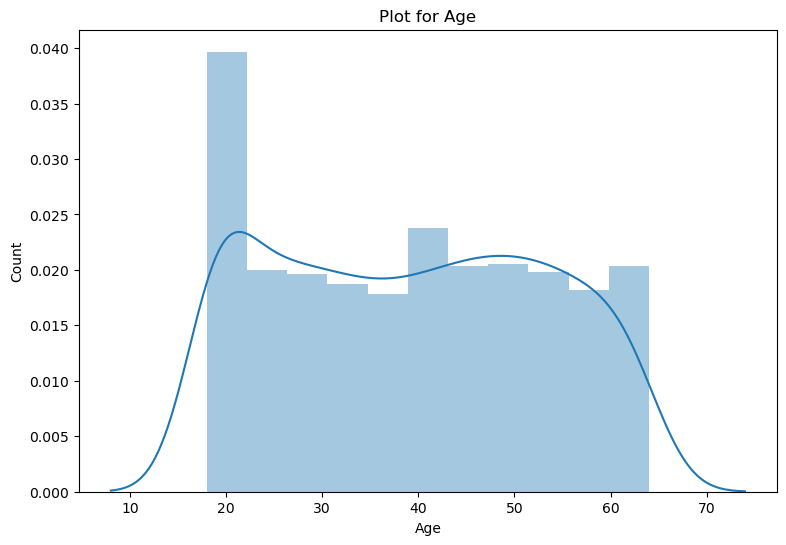

In [29]:
plt.figure(figsize=(9,6))
sns.distplot(df_copy['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

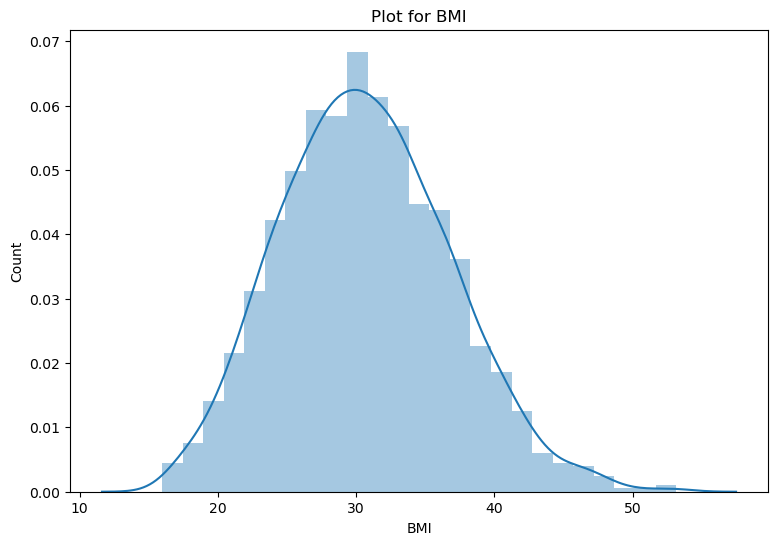

In [30]:
plt.figure(figsize=(9,6))
sns.distplot(df_copy['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

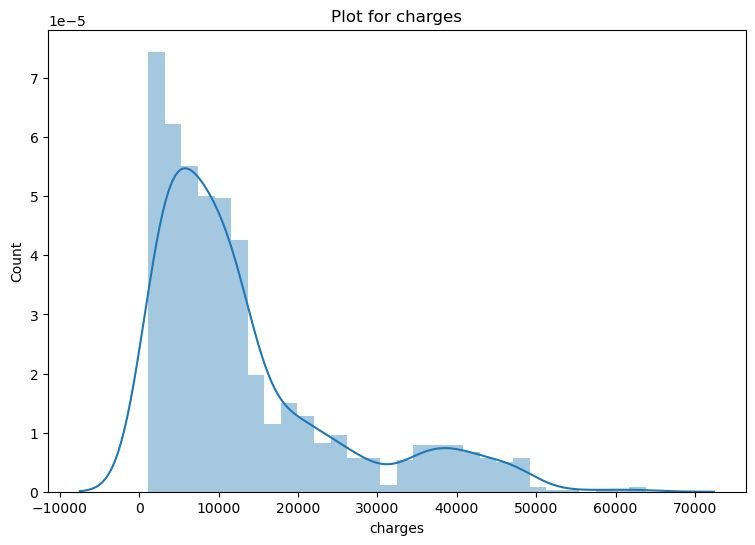

In [31]:
plt.figure(figsize=(9,6))
sns.distplot(df_copy['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

# Prepating data - We can scale BMI and Charges Column before proceeding with Prediction

In [32]:
from sklearn.preprocessing import StandardScaler
df_pre = df_copy.copy()

tempBmi = df_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
df_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = df_pre.age
tempAge = tempAge.values.reshape(-1,1)
df_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = df_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
df_pre['charges'] = StandardScaler().fit_transform(tempCharges)

df_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


In [33]:
X = df_pre.drop('charges',axis=1).values
y = df_pre['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 6)
Size of Y_test :  (268, 1)


In [34]:
#Importing Libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
!pip install xgboost
import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

# Linear Regression

In [35]:
# Model initialization and training

In [36]:
%%time
linear_regn = LinearRegression()
linear_regn.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 3.99 ms


LinearRegression()

In [37]:
# Splitting dataset into training and testing sets
cv_linear_regn = cross_val_score(estimator = linear_regn, X = X, y = y, cv = 10)

# Model evaluation
y_pred_linear_regn_train = linear_regn.predict(X_train)
r2_score_linear_regn_train = r2_score(y_train, y_pred_linear_regn_train)

y_pred_linear_regn_test = linear_regn.predict(X_test)
r2_score_linear_regn_test = r2_score(y_test, y_pred_linear_regn_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_regn_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_regn.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_regn_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_regn_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.745
R2_score (train) : 0.741
R2_score (test) : 0.783
RMSE : 0.480


# Support Vector Machine (Regression)

In [38]:
# Data preprocessing 
X_c = df_copy.drop('charges',axis=1).values
y_c = df_copy['charges'].values.reshape(-1,1)

# Split data into features and target variable
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,y_c,test_size=0.2, random_state=42)

# Model initialization and training
X_train_scaled = StandardScaler().fit_transform(X_train_c)
y_train_scaled = StandardScaler().fit_transform(y_train_c)
X_test_scaled = StandardScaler().fit_transform(X_test_c)
y_test_scaled = StandardScaler().fit_transform(y_test_c)

svr = SVR()
#svr.fit(X_train_scaled, y_train_scaled.ravel())

In [39]:
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train_scaled, y_train_scaled.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [40]:
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train_scaled, y_train_scaled.ravel())
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)

SVR(C=10, gamma=0.1, tol=0.0001)
0.8311276912561496


In [41]:
# Model evaluation
cv_svr = svr_grid.best_score_

y_pred_svr_train = svr.predict(X_train_scaled)
r2_score_svr_train = r2_score(y_train_scaled, y_pred_svr_train)

y_pred_svr_test = svr.predict(X_test_scaled)
r2_score_svr_test = r2_score(y_test_scaled, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_svr_test)))

print('CV : {0:.3f}'.format(cv_svr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

CV : 0.831
R2_score (train) : 0.857
R2 score (test) : 0.871
RMSE : 0.359


In [42]:
models = [('Linear Regression', rmse_linear, r2_score_linear_regn_train, r2_score_linear_regn_test, cv_linear_regn.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean())   
         ]

In [43]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,0.479808,0.741410,0.782694,0.744528
1,Support Vector Regression,0.358769,0.857235,0.871285,0.831128


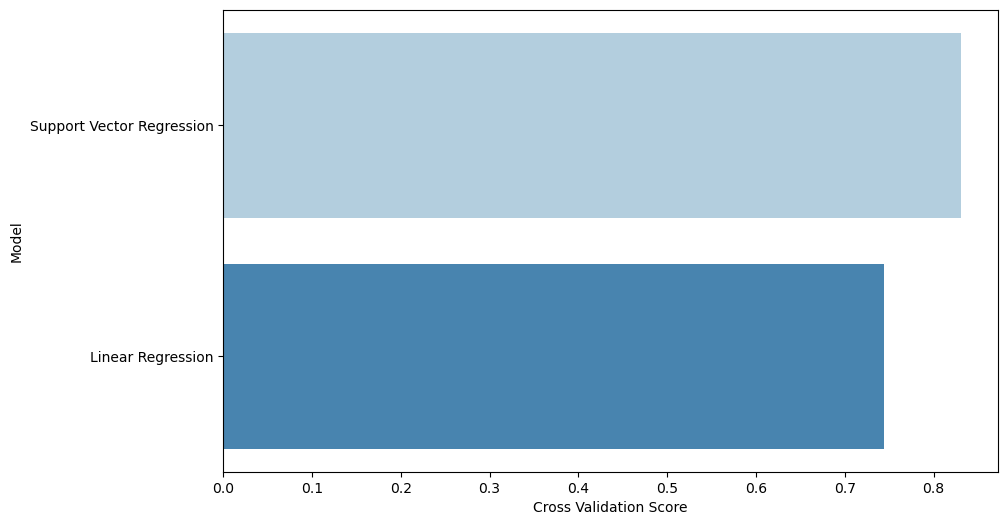

In [44]:
plt.figure(figsize=(10,6))
predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model',data = predict, palette='Blues')
plt.xlabel('Cross Validation Score')
plt.ylabel('Model')
plt.show()

In [45]:
#end...